In [18]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn import datasets,linear_model
from matplotlib import pyplot

#Importing the data file present in csv format
file_name = "C:/Users/akhil/OneDrive/Desktop/Machine Learning/Daily_Vehicle_Miles_of_Travel__Beginning_1985.csv"
#reading the data in file
data = pd.read_csv(file_name)
print(data)


      Year   Urban Area            Functional Class  Functional Class Code  \
0     2011        Rural                  Interstate                      1   
1     2011        Rural        Other Princ Arterial                      2   
2     2011        Rural              Minor Arterial                      6   
3     2011        Rural             Major Collector                      7   
4     2011        Rural             Minor Collector                      8   
...    ...          ...                         ...                    ...   
1695  2003    Urbanized  Collector/Major Collector*                     17   
1696  2008        Rural                  Interstate                      1   
1697  2008  Small Urban        Other Princ Arterial                     14   
1698  1988    Urbanized             Minor Collector                     18   
1699  2000    Urbanized                  Interstate                     11   

      Vehicle Miles Travelled  
0                     16852.0  

In [19]:
#Droping the unwanted column
data = data.drop('Functional Class',axis = 1)
print(data)

      Year   Urban Area  Functional Class Code  Vehicle Miles Travelled
0     2011        Rural                      1                  16852.0
1     2011        Rural                      2                  10464.0
2     2011        Rural                      6                  12987.0
3     2011        Rural                      7                  11302.0
4     2011        Rural                      8                  25683.0
...    ...          ...                    ...                      ...
1695  2003    Urbanized                     17                  19944.0
1696  2008        Rural                      1                  16874.0
1697  2008  Small Urban                     14                   3292.0
1698  1988    Urbanized                     18                      NaN
1699  2000    Urbanized                     11                  44824.0

[1700 rows x 4 columns]


In [20]:
#To shuffel the columns from one place to another.
# get a list of columns
cols = list(data)
# move the column to head of list using index, pop and insert
cols.insert(0, cols.pop(cols.index('Urban Area')))
cols
# use ix to reorder
data = data.ix[:, cols]

C:\Users\akhil\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: FutureWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#ix-indexer-is-deprecated
  import sys
C:\Users\akhil\Anaconda3\lib\site-packages\pandas\core\indexing.py:822: FutureWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#ix-indexer-is-deprecated
  retval = getattr(retval, self.name)._getitem_axis(key, axis=i)


In [21]:
data

,Urban Area,Year,Functional Class Code,Vehicle Miles Travelled
0,Rural,2011,1,16852.0
1,Rural,2011,2,10464.0
2,Rural,2011,6,12987.0
3,Rural,2011,7,11302.0
4,Rural,2011,8,25683.0
...,...,...,...,...
1695,Urbanized,2003,17,19944.0
1696,Rural,2008,1,16874.0
1697,Small Urban,2008,14,3292.0
1698,Urbanized,1988,18,NaN


In [22]:
#Converting Categorical data in Numeric
converter = LabelEncoder()
data['Urban Area'] = converter.fit_transform(data['Urban Area'].astype(str))
data

,Urban Area,Year,Functional Class Code,Vehicle Miles Travelled
0,0,2011,1,16852.0
1,0,2011,2,10464.0
2,0,2011,6,12987.0
3,0,2011,7,11302.0
4,0,2011,8,25683.0
...,...,...,...,...
1695,2,2003,17,19944.0
1696,0,2008,1,16874.0
1697,1,2008,14,3292.0
1698,2,1988,18,NaN


In [23]:
#Checking for any null values present or not
print(data.isnull().any())

Urban Area                 False
Year                       False
Functional Class Code      False
Vehicle Miles Travelled     True
dtype: bool


In [24]:
#Delete row with dummy value with Nan
data = data.dropna()
print(data.isnull().any())

Urban Area                 False
Year                       False
Functional Class Code      False
Vehicle Miles Travelled    False
dtype: bool


In [25]:
data.head(10) #for printing the top 10 rows 
data.dtypes # for checking the data tpes of a values present in data


Urban Area                   int32
Year                         int64
Functional Class Code        int64
Vehicle Miles Travelled    float64
dtype: object

In [26]:
data.shape # to show the number of rows and column 
data.describe() # to show statistical summary

,Urban Area,Year,Functional Class Code,Vehicle Miles Travelled
count,1614.000000,1614.000000,1614.000000,1614.000000
mean,0.998141,1999.517348,11.716853,18310.558860
std,0.817127,8.748572,5.264463,16446.432845
min,0.000000,1985.000000,1.000000,155.000000
25%,0.000000,1992.000000,8.000000,2922.500000
50%,1.000000,1999.000000,12.000000,14023.000000
75%,2.000000,2007.000000,16.000000,28396.000000
max,2.000000,2016.000000,19.000000,60855.000000


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000158B7D7E5C8>,
      dtype=object)

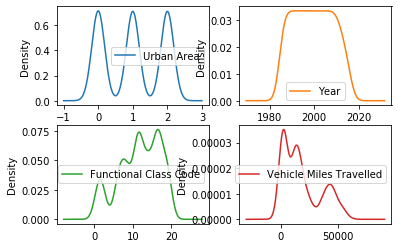

In [27]:
data.plot(kind = 'density',subplots=True,layout=(2,2),sharex=False,sharey=False) #visualization in the form of Density 

In [28]:
data.groupby('Urban Area').size() #To find the number of dstinct urban area  

Urban Area
0    540
1    537
2    537
dtype: int64

In [32]:
x = data.iloc[:,1:4] #defining the lables to fit into model

y= data.iloc[:,0] #defining the target to fit into model

print(len(x)) #showing the total length of lables

print(len(y)) #showing the total length of target

1614
1614


In [33]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = 0.4) #splitting dataset into training and testing datset

In [34]:
#Applying naive bayse algorithm with gaussian likelyhood function
from sklearn.naive_bayes import GaussianNB
model = GaussianNB()
model.fit(x_train,y_train)
y_pred = model.predict(x_test) # predicting the values.
print(y_pred)

[0 2 2 2 1 1 0 1 0 2 0 2 1 1 1 0 1 1 0 2 2 0 2 0 0 1 1 1 2 0 0 0 0 1 2 2 0
 2 1 1 1 2 1 1 1 0 1 0 2 1 0 0 2 2 2 0 2 2 1 0 2 1 0 0 1 2 0 2 0 2 2 1 1 2
 2 0 2 2 1 1 1 2 1 2 0 0 1 0 1 2 0 1 0 2 1 2 1 1 1 2 1 0 1 0 2 0 0 0 1 0 0
 0 1 2 1 1 2 2 1 2 0 2 1 0 1 0 0 0 1 1 1 0 2 1 0 0 0 0 2 2 0 2 1 1 2 1 1 2
 2 2 0 2 2 2 1 2 2 0 1 2 1 0 2 0 1 2 1 1 2 1 1 0 1 0 2 1 2 1 0 2 1 0 0 2 0
 1 0 1 2 1 1 2 2 0 0 1 1 0 0 0 0 0 2 2 2 0 0 1 2 0 2 0 2 0 2 2 1 2 0 0 2 1
 0 1 1 0 0 2 2 0 0 2 1 0 1 2 1 2 2 2 0 1 2 1 1 1 2 2 0 1 2 2 0 2 0 0 2 0 0
 0 0 2 0 1 2 2 0 2 0 1 0 2 1 0 0 0 0 0 2 1 2 1 2 1 1 2 1 1 1 1 0 1 2 0 2 2
 1 2 0 0 0 2 1 2 1 2 1 2 1 1 2 0 1 2 1 1 2 1 0 2 1 0 0 0 2 2 2 2 1 2 2 2 1
 2 1 1 0 0 1 1 2 1 0 2 2 2 2 2 2 0 1 2 2 0 2 2 1 1 2 2 1 0 2 1 2 2 0 1 2 2
 0 2 0 1 1 1 1 0 1 1 2 0 2 0 2 1 2 2 0 2 1 0 1 0 2 0 2 1 1 0 1 0 1 2 2 1 0
 0 0 1 0 0 1 2 1 0 2 2 2 0 1 0 1 1 2 2 2 0 1 2 1 1 1 2 0 0 1 0 0 0 1 0 0 0
 1 0 1 0 0 1 2 0 1 2 0 2 2 2 2 0 1 2 0 1 0 0 1 2 1 2 1 1 1 0 0 2 0 0 1 0 0
 1 2 2 2 2 2 2 1 0 2 1 2 

In [35]:
# Calculating the Accuracy
from sklearn import metrics
print("Accuracy of Model:",metrics.accuracy_score(y_test, y_pred))

print('Accuracy for Naive bayes classifier on training set: {:.2f}'
     .format(model.score(x_train, y_train)))
print('Accuracy for Naive bayes classifier on test set: {:.2f}'
     .format(model.score(x_test, y_test)))

Accuracy of Model: 0.9984520123839009
Accuracy for Naive bayes classifier on training set: 1.00
Accuracy for Naive bayes classifier on test set: 1.00


In [36]:
#Applying naive bayse algorithm with Multinomial likelyhood function
from sklearn.naive_bayes import MultinomialNB
model = MultinomialNB()
model.fit(x_train,y_train)
y_pred = model.predict(x_test)
y_pred

array([0, 2, 2, 2, 1, 1, 0, 1, 0, 2, 0, 2, 1, 1, 1, 0, 1, 1, 0, 0, 2, 0,
       2, 0, 0, 1, 1, 1, 2, 0, 0, 0, 0, 1, 2, 0, 0, 2, 1, 1, 1, 2, 1, 1,
       1, 0, 1, 0, 0, 1, 0, 0, 2, 0, 2, 0, 2, 2, 1, 0, 2, 1, 0, 0, 1, 2,
       0, 2, 0, 2, 2, 1, 1, 2, 2, 0, 2, 2, 1, 1, 1, 2, 1, 2, 0, 0, 1, 0,
       1, 2, 0, 1, 0, 2, 1, 2, 1, 1, 1, 2, 1, 2, 1, 0, 2, 0, 2, 0, 1, 0,
       0, 0, 1, 2, 1, 1, 2, 0, 1, 2, 0, 2, 1, 0, 1, 0, 0, 0, 1, 1, 1, 2,
       2, 1, 0, 2, 0, 0, 2, 2, 2, 2, 1, 1, 2, 1, 1, 0, 2, 2, 0, 2, 2, 0,
       1, 2, 2, 0, 1, 2, 1, 0, 0, 2, 1, 2, 1, 1, 2, 1, 1, 2, 1, 2, 2, 1,
       2, 1, 0, 2, 1, 0, 0, 2, 0, 1, 0, 1, 2, 1, 1, 2, 0, 0, 0, 1, 1, 0,
       0, 1, 2, 0, 2, 2, 2, 0, 2, 1, 0, 0, 2, 0, 2, 0, 0, 2, 1, 0, 0, 0,
       2, 1, 2, 1, 1, 0, 0, 2, 2, 0, 0, 2, 1, 0, 1, 2, 1, 2, 2, 2, 0, 1,
       2, 1, 1, 1, 2, 2, 2, 1, 2, 0, 2, 2, 0, 0, 0, 0, 0, 0, 0, 2, 0, 1,
       0, 2, 0, 0, 0, 1, 0, 2, 1, 0, 0, 0, 0, 0, 2, 1, 2, 1, 2, 1, 1, 2,
       1, 1, 1, 1, 0, 1, 2, 0, 2, 2, 1, 2, 0, 0, 0,

In [37]:
# Calculating the Accuracy
from sklearn import metrics
print("Accuracy of Model:",metrics.accuracy_score(y_test, y_pred))

print('Accuracy for Naive bayes classifier on training set: {:.2f}'
     .format(model.score(x_train, y_train)))
print('Accuracy for Naive bayes classifier on test set: {:.2f}'
     .format(model.score(x_test, y_test)))

Accuracy of Model: 0.9024767801857585
Accuracy for Naive bayes classifier on training set: 0.90
Accuracy for Naive bayes classifier on test set: 0.90
